# Distribution Plots 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seaborn has some built in dataframes like R 
# calling one of them and saving to a data frame
tips=sns.load_dataset('tips')

In [3]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


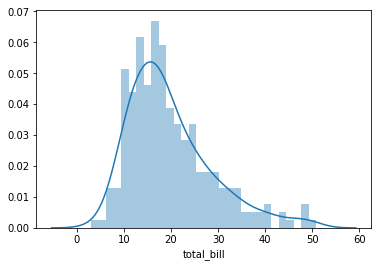

In [4]:
# Distplot = distribution pf univariate variable
sns.distplot(tips['total_bill'],bins=30)

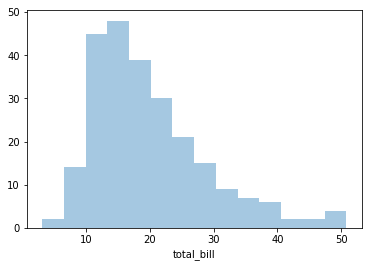

In [5]:
sns.distplot(tips['total_bill'],kde=False)

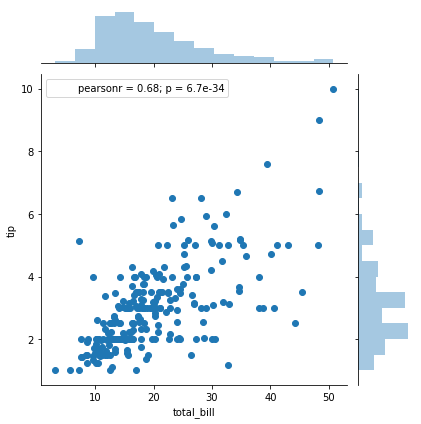

In [6]:
# joint plots = bivariate distributions
sns.jointplot(x='total_bill',y='tip',data=tips)

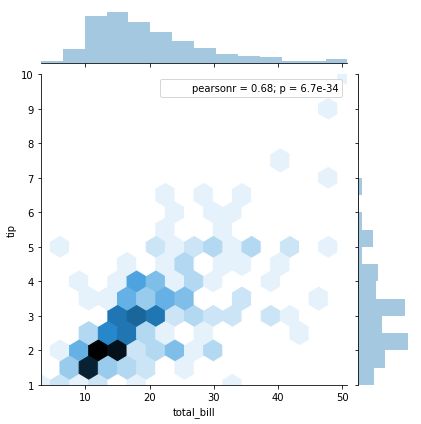

In [7]:
# joint plots take in a kind parameter also
# in the above line it is scatter 
# we can change it as well
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

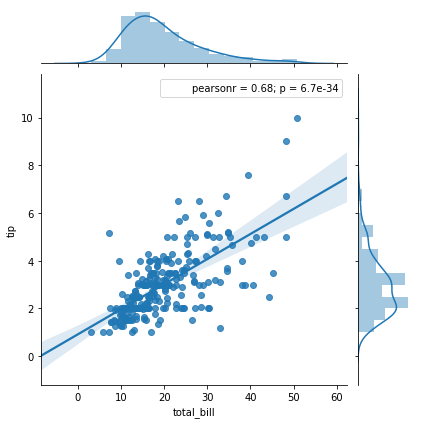

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
# Linear regression line 
# can also se kde plots with kind kde

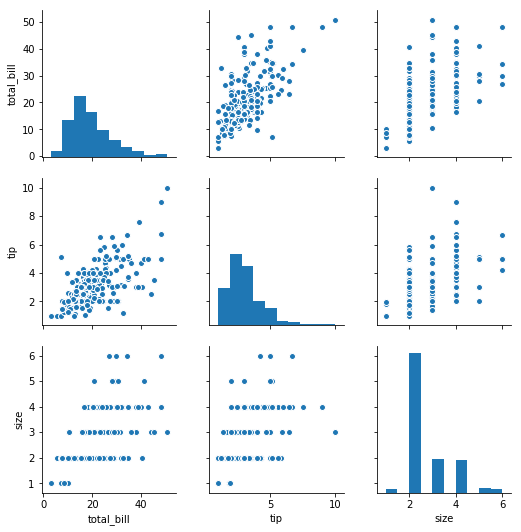

In [9]:
# pairplot = pair wise relationships for all numeric variables 
# also supports color hue column for categorical variables 
sns.pairplot(tips)

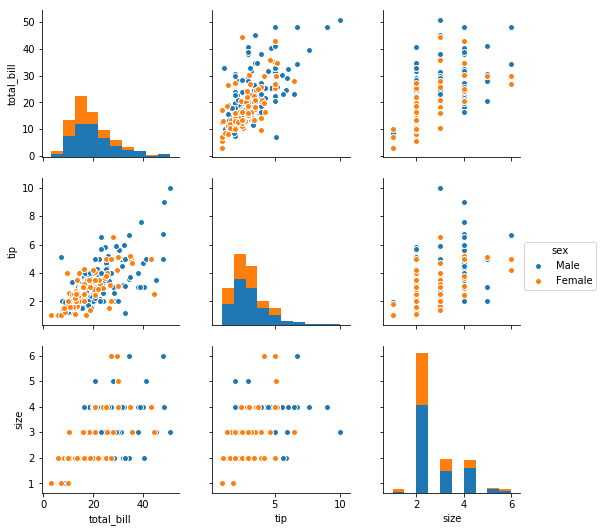

In [10]:
sns.pairplot(tips,hue='sex')

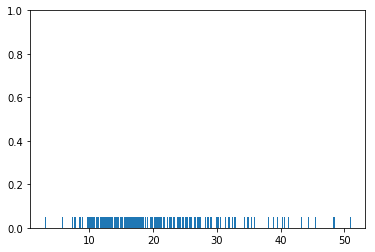

In [11]:
# Rugplots = plots the number of data points (denser meaning more points)
sns.rugplot(tips['total_bill'])

In [12]:
# KDE plot= sums density of rugplot to reach the final distribution in form of a kernel

(0, 1)

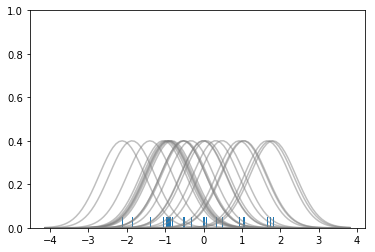

In [13]:
# creating a KDE PLOT from scratch 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

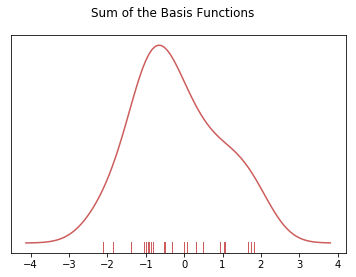

In [14]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

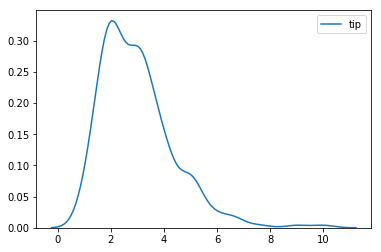

In [15]:
sns.kdeplot(tips['tip'])

# Categorical Plots 

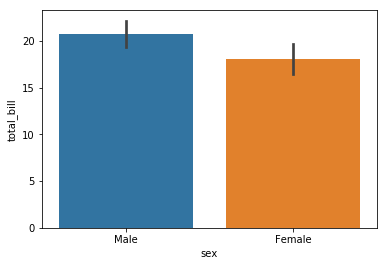

In [16]:
# barplot = shows categorical variable against a numeric variable 
# default setting is mean 
# we can chnage it to any statistical measure
sns.barplot(x='sex',y='total_bill',data=tips)

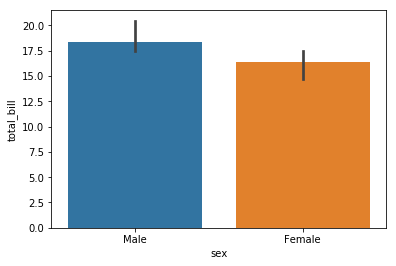

In [17]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.median)

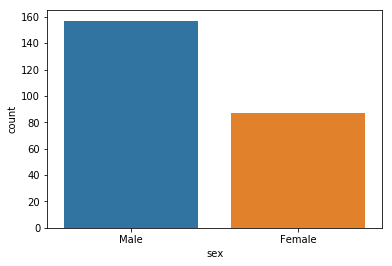

In [18]:
# countplot = will give just the counts 
sns.countplot(x='sex',data=tips)

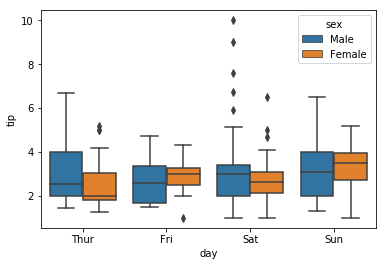

In [19]:
# boxplot = distribution of categorical data 
sns.boxplot(x='day',y='tip',data=tips,hue='sex')

In [20]:
# Violin plot= same as boxplot along with kernel density plot 

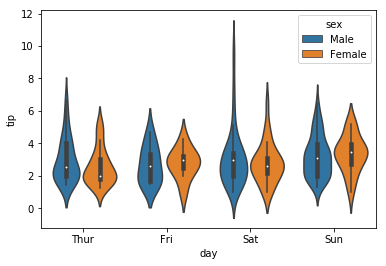

In [21]:
sns.violinplot(x='day',y='tip',data=tips,hue='sex')

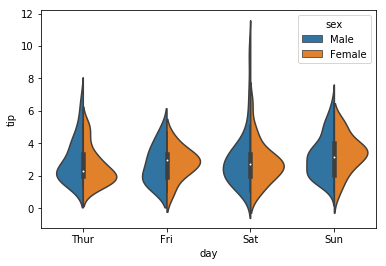

In [22]:
sns.violinplot(x='day',y='tip',data=tips,hue='sex',split=True)

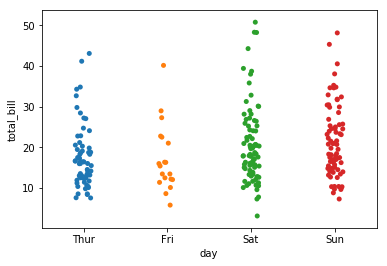

In [23]:
# Strip plot = one categorical variable 
# essentially a scatterplot based off the categorical variable 
# Jitter can be added to it just like r 
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True)

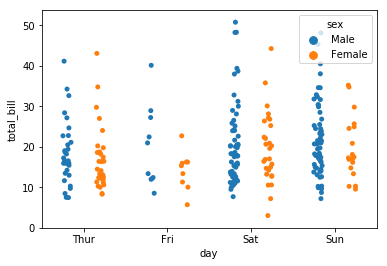

In [24]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True,hue='sex',dodge=True)

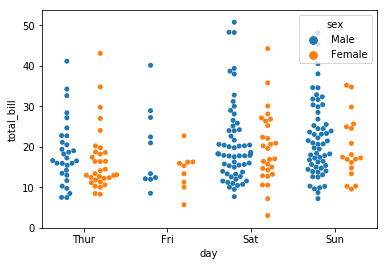

In [25]:
# Swarm plot = combination of strip plot and violin plot
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

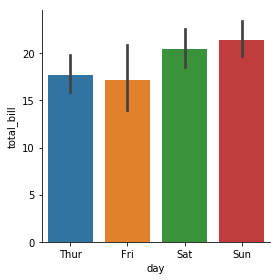

In [26]:
# Factor Plot = general method to plot everything seen so far
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

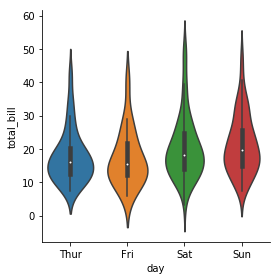

In [27]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

# matrix plots 

In [28]:
flights=sns.load_dataset('flights')

In [29]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [30]:
# for heatmap dat should already be in matrix form
# meaning both rows and columns should have variables as indices 
cr=tips.corr()

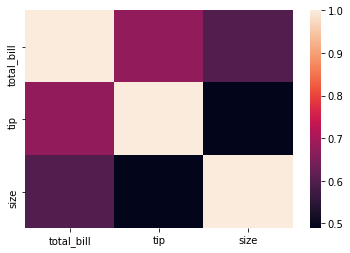

In [31]:
sns.heatmap(cr)

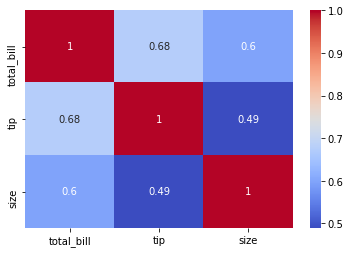

In [32]:
# cmap string specifies colormap 
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [33]:
# converting the flights dataset into matrix form
fp=flights.pivot_table(index='year',columns='month',values='passengers')

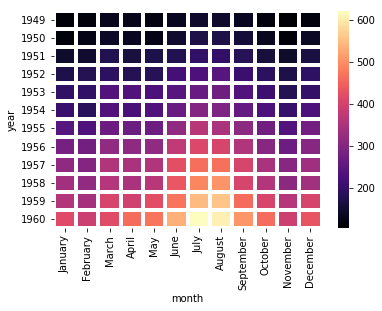

In [34]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=3)

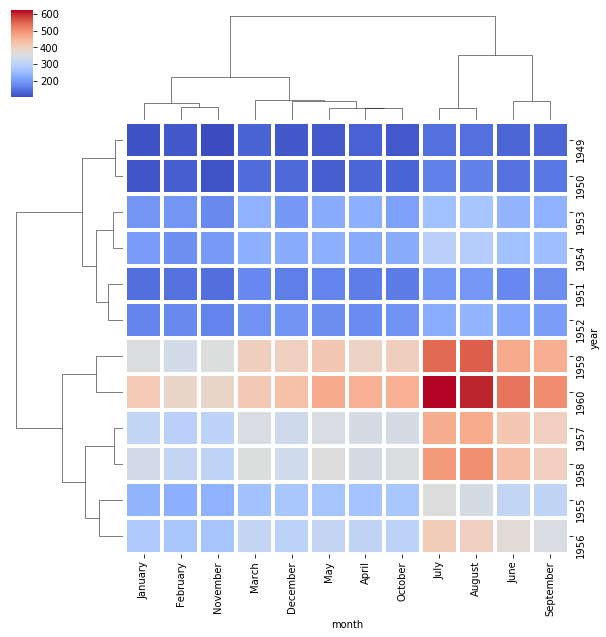

In [35]:
# Cluster Map = uses hierachial clustring to produce a clustered heatmap
sns.clustermap(fp,cmap='coolwarm',linecolor='white',linewidths=3)
# months years order changes , similar months placed together 

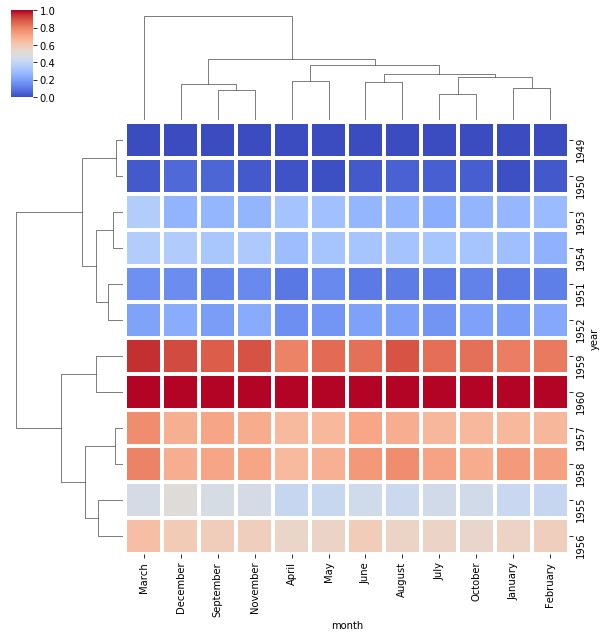

In [36]:
# we can also standardize variables in a cluster map
sns.clustermap(fp,cmap='coolwarm',linecolor='white',linewidths=3,standard_scale=1)

# Grids

In [37]:
iris=sns.load_dataset('iris')

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


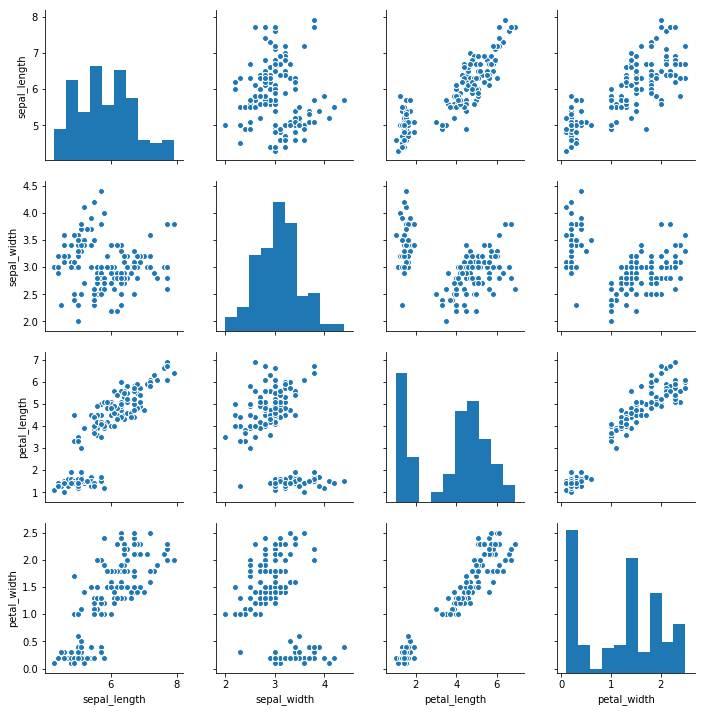

In [39]:
sns.pairplot(iris)

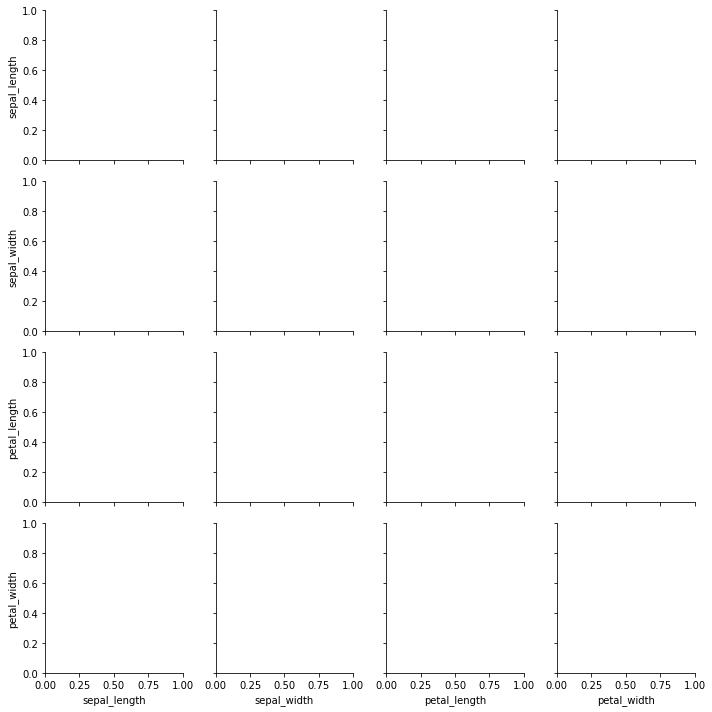

In [40]:
# we will try to control what goes in what section of the grid
sns.PairGrid(iris)
# this creates an empty grid for all numerical variables 
# best practise is to set this equal to an object and then continue plotting

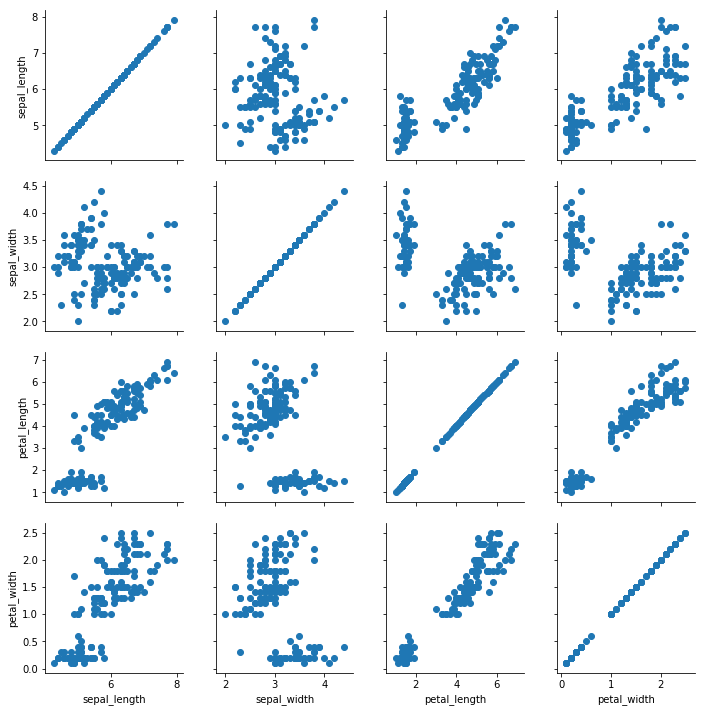

In [41]:
# we can use map fucntion to plot various plots to the grid
p=sns.PairGrid(iris)
p.map(plt.scatter) 

/Users/aparajit/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


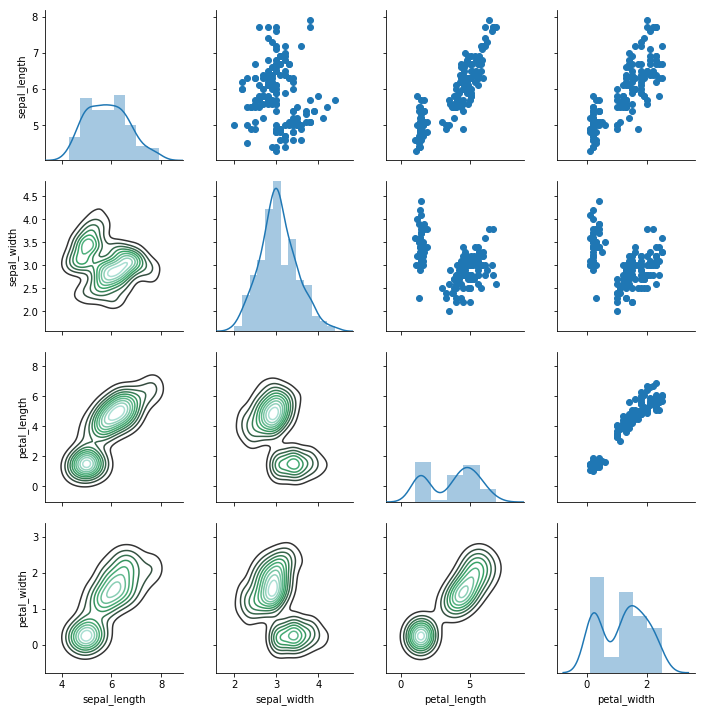

In [42]:
# We can also control what goes in the upper lower and on the diagonal itself
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

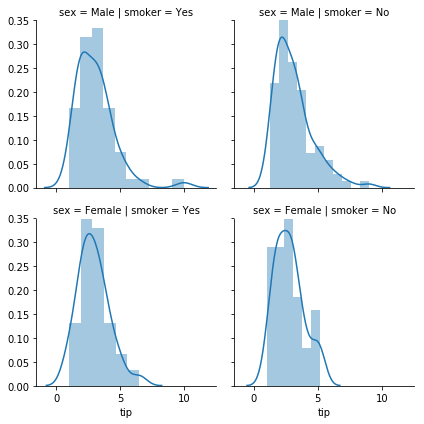

In [43]:
# facetgrid = allows us to create a grid basis variables in our dataset 
# then we can plot any plot within it segragated by the variables we chose 
g=sns.FacetGrid(data=tips,row='sex',col='smoker')
g.map(sns.distplot,'tip')

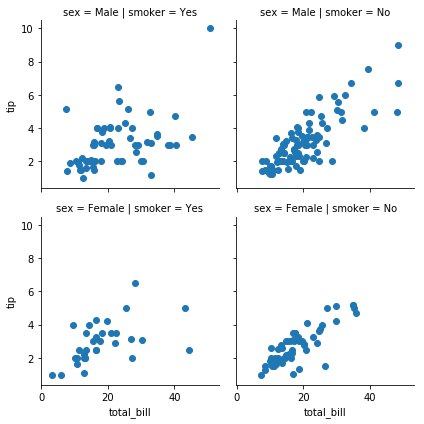

In [44]:
g=sns.FacetGrid(data=tips,row='sex',col='smoker')
g.map(plt.scatter,'total_bill','tip')

# Regression Plots

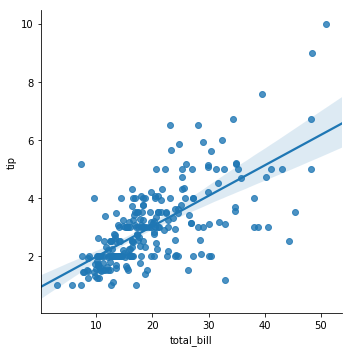

In [45]:
# LM plots for linear models 
sns.lmplot(data=tips,x='total_bill',y='tip')

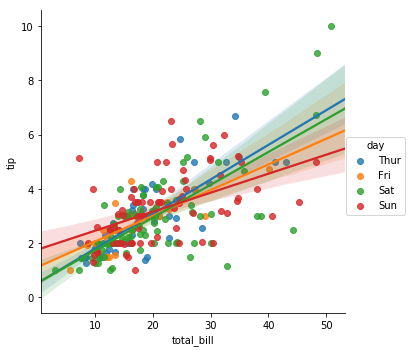

In [46]:
sns.lmplot(data=tips,x='total_bill',y='tip',hue='day')

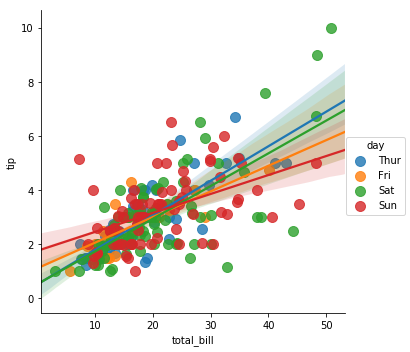

In [47]:
# we can also pass in matplotlib arguments in it in a dictionary
sns.lmplot(data=tips,x='total_bill',y='tip',hue='day',scatter_kws={'s':100})

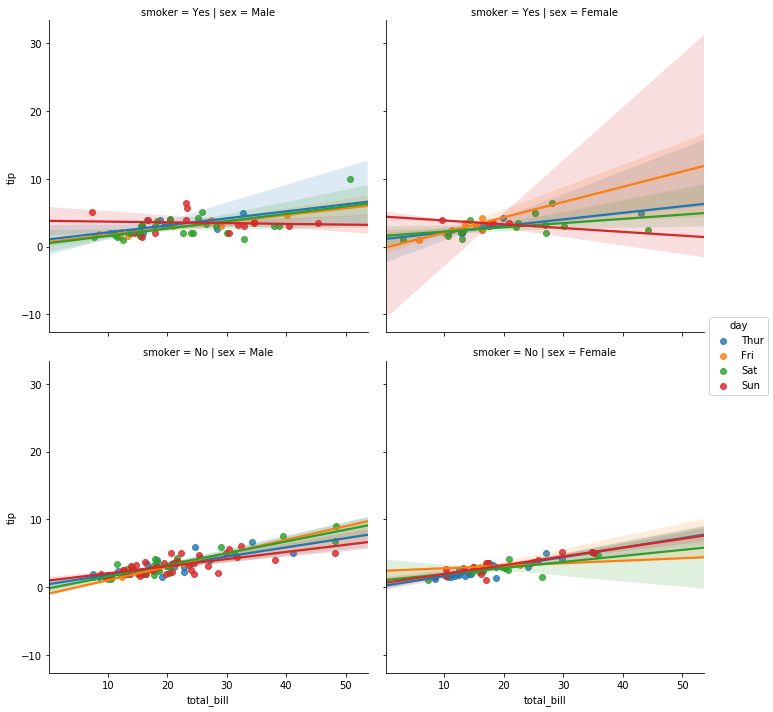

In [48]:
# with lmplots also we can make factor plots 
sns.lmplot(data=tips,x='total_bill',y='tip',hue='day',row='smoker',col='sex')

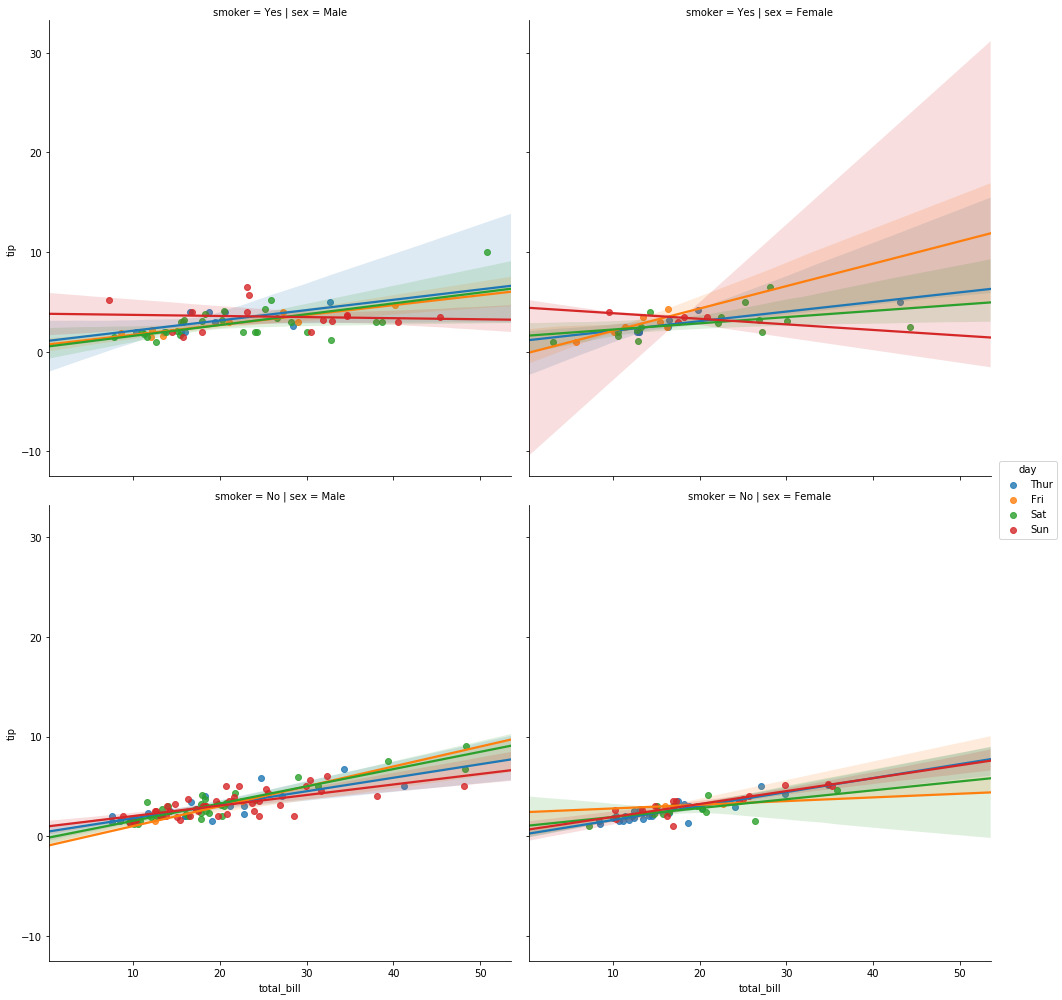

In [49]:
# to adjust fig size and aspect ratio
sns.lmplot(data=tips,x='total_bill',y='tip',hue='day',row='smoker',col='sex',
          aspect=1,size=7)

# Style and color 

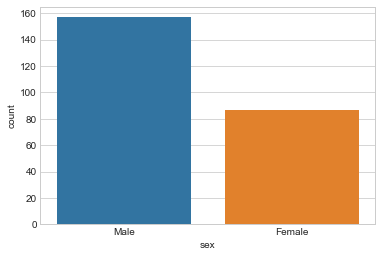

In [52]:
# seaborn has a set_style fucntion that will let you set the style for rest of the plots 
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

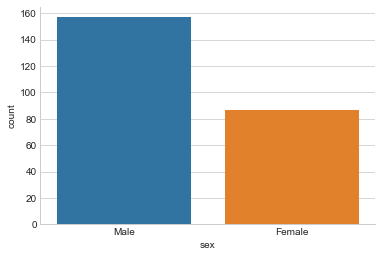

In [53]:
# The top and right spines can be removed as well
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine()

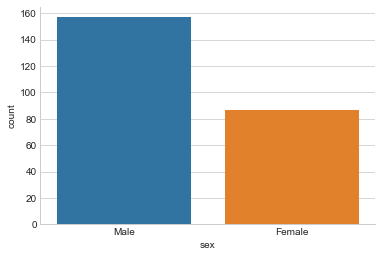

In [56]:
# matplotlib will overwrite the figure size set by seaborn
plt.figure(figsize=(6,4))
sns.countplot(x='sex',data=tips)
sns.despine()

# End !